<a href="https://colab.research.google.com/github/slaninam/MCDA/blob/master/exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import urllib.request
import zipfile

from pathlib import Path

datafile = Path('data.zip')

if not datafile.exists():
  print('Retrieving data file')
  url = 'https://m-cloud.netztest.at/RMBTStatisticServer/export/netztest-opendata-2019-09.zip'
  #url = 'https://control.netmetr.cz/RMBTStatisticServer/export/NetMetr-opendata-2019-09.zip'
  urllib.request.urlretrieve(url, 'data.zip')

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')
    
df = pd.read_csv('netztest-opendata-2019-09.csv')

lte = df[df['network_type'] == 'LTE'] 
lte = lte[lte['country_location'] == 'AT']
lte = lte[lte['download_kbit'] < 50000] 
print(len(lte))


14087


In [0]:
sorted(list(lte))

In [0]:
!pip install geopandas
!pip install contextily==1.0rc2

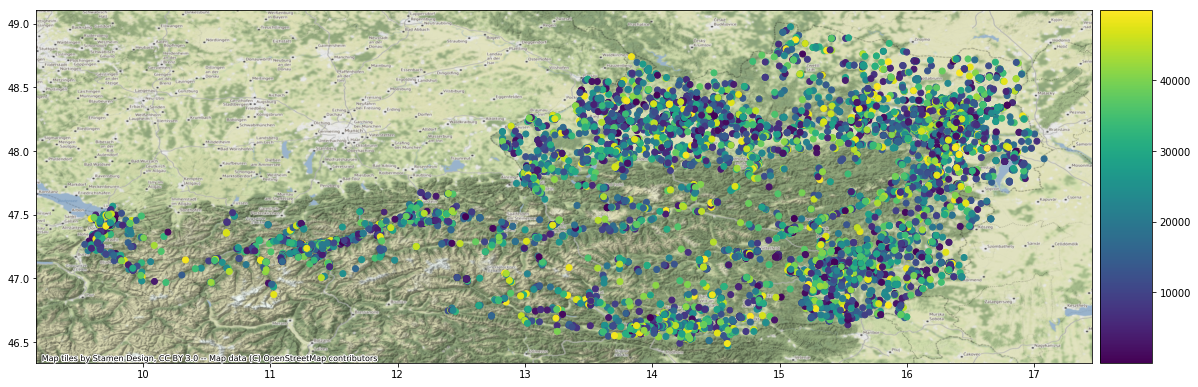

In [53]:
import geopandas
import matplotlib.pyplot as mpl
import contextily as ctx
from shapely.geometry import Point
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Prepare axes for legend
fig,ax = plt.subplots(1,1,figsize = (20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)

# Prepare data
crs={'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(lte['long'], lte['lat'])]
geo_df = geopandas.GeoDataFrame(lte, crs = crs, geometry = geometry)

# Plot data and backrgound map
geo_df.plot(ax=ax, cax=cax, column='download_kbit', legend='True')
ctx.add_basemap(ax, crs=geo_df.crs)